In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re, email
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import nltk

In [2]:
################ Content Loading ################
################ Content Loading ################
################ Content Loading ################
if(os.path.isdir('.')):
    if('patrick.txt' in os.listdir('.')):
        df = pd.read_csv('./small_emails.csv');
#elif()
print(len(df))

5728


In [3]:
################ Text Cleaning ################
################ Text Cleaning ################
################ Text Cleaning ################
content = []
for i in range(len(df)):
    #Removing 'Subjet: from the text' ##Still applicable to email data
    #content.append(re.sub('^Subject: .*','',df.text[i]))
    content.append(re.sub('^Subject: ','',df.text[i]))
    #Removing the \r and \n strings  ##Still applicable to email data
    content[i] = (re.sub('[\\n\\r\_]',' ',content[i]))
    #removing space before period ##Still applicable to email data
    content[i] = (re.sub('\s\.','.',content[i]))
    #removing space after the period ##Still applicable to email data
    content[i] = (re.sub('\.(\s)*','. ',content[i]))
    #removing any double spaces
    content[i] = (re.sub('\s+',' ',content[i]))
    #removing individual text from the dataset
    content[i] = (re.sub('[0-9]+','',content[i]))

In [4]:
################ Download Stop words ################
################ Download Stop words ################
################ Download Stop words ################
nltk.download("stopwords") #Download the stop words if you do not have them

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/patrickadjei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
################ Tokenizing each document(email) ################
################ Tokenizing each document(email) ################
################ Tokenizing each document(email) ################
tokenizedContent = []
buffer = []
tokenizer = RegexpTokenizer(r'\w+')
#tokenizing and removing the stopwords::::: The logic is tokenize if it is not a stop word
for i in range(len(content)):
    for word in tokenizer.tokenize(content[i]):
        if(word.lower() not in stopwords.words('english')):
            buffer.append(word)
    tokenizedContent.append(buffer)
    buffer = [] 

In [6]:
################ Text Normalization ################
################ Text Normalization ################
################ Text Normalization ################
Snowball_stemmer = nltk.stem.SnowballStemmer('english');
cleanTokens = []
#Lemmatizing and stemming the tokenized words::::: This is normalizing the text data
for i in range(len(tokenizedContent)):
    #Stemming::: Making all variant words homogeneous
    stemmedContent = [word for word in tokenizedContent[i]]
    #Lemmatizing:::  Putting the word in their root form
    lemmatized = [WordNetLemmatizer().lemmatize(word) for word in stemmedContent];
    cleanTokens.append(' '.join(lemmatized))

In [7]:
################ TFIDF Model ################
################ TFIDF Model ################
################ TFIDF Model ################
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 0.08, max_df =0.9)
features = tfidf.fit_transform(cleanTokens)

In [12]:
X = pd.DataFrame(features.todense(), columns = tfidf.get_feature_names())

In [9]:
################ Remove documents low in words (doc < 5 words .You can change the length if you want)################
################ Remove documents low in words (doc < 5 words .You can change the length if you want)################
################ Remove documents low in words (doc < 5 words .You can change the length if you want)################

cleanTokens[:] = [sentence for sentence in cleanTokens if len(sentence.split()) > 5]

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams

In [11]:
################ Performing ngram Model ################
################ Performing ngram Model ################
################ Performing ngram Model ################
vect = CountVectorizer(ngram_range=(6,6))
X = vect.fit_transform(cleanTokens)

#X.toarray()

In [79]:
################ Display the vector ################
################ Display the vector ################
################ Display the vector ################
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
from sklearn import svm
clf = svm.SVC(gamma=0.1)
clf.fit(X,df['spam'])
#X[0:len(X)*0.7]
pred = clf.predict(X[5000:])

In [6]:
################ Getting Unique Words and their Count ################
################ Getting Unique Words and their Count ################
################ Getting Unique Words and their Count ################
dictionary = {}
for i in range(len(cleanTokens)):
    word = [word for word in cleanTokens[i].split()]
    for j in word:
        if j in dictionary:
            dictionary[j] += 1
        else:
            dictionary[j] = 1

In [7]:
################ Adding Word and the Count in array ################
################ Adding Word and the Count in array ################
################ Adding Word and the Count in array ################
wordAndCount = []
for i in range(len(dictionary.keys())):
    wordAndCount.append([list(dictionary.keys())[i],list(dictionary.values())[i]])
    
################ Sorting by count ################
################ Sorting by count ################
################ Sorting by count ################
wordAndCount.sort(key=lambda x:x[1])

################ Seperating the words and count into two different arrays ################
################ Seperating the words and count into two different arrays ################
################ Seperating the words and count into two different arrays ################
words,count = zip(*wordAndCount)

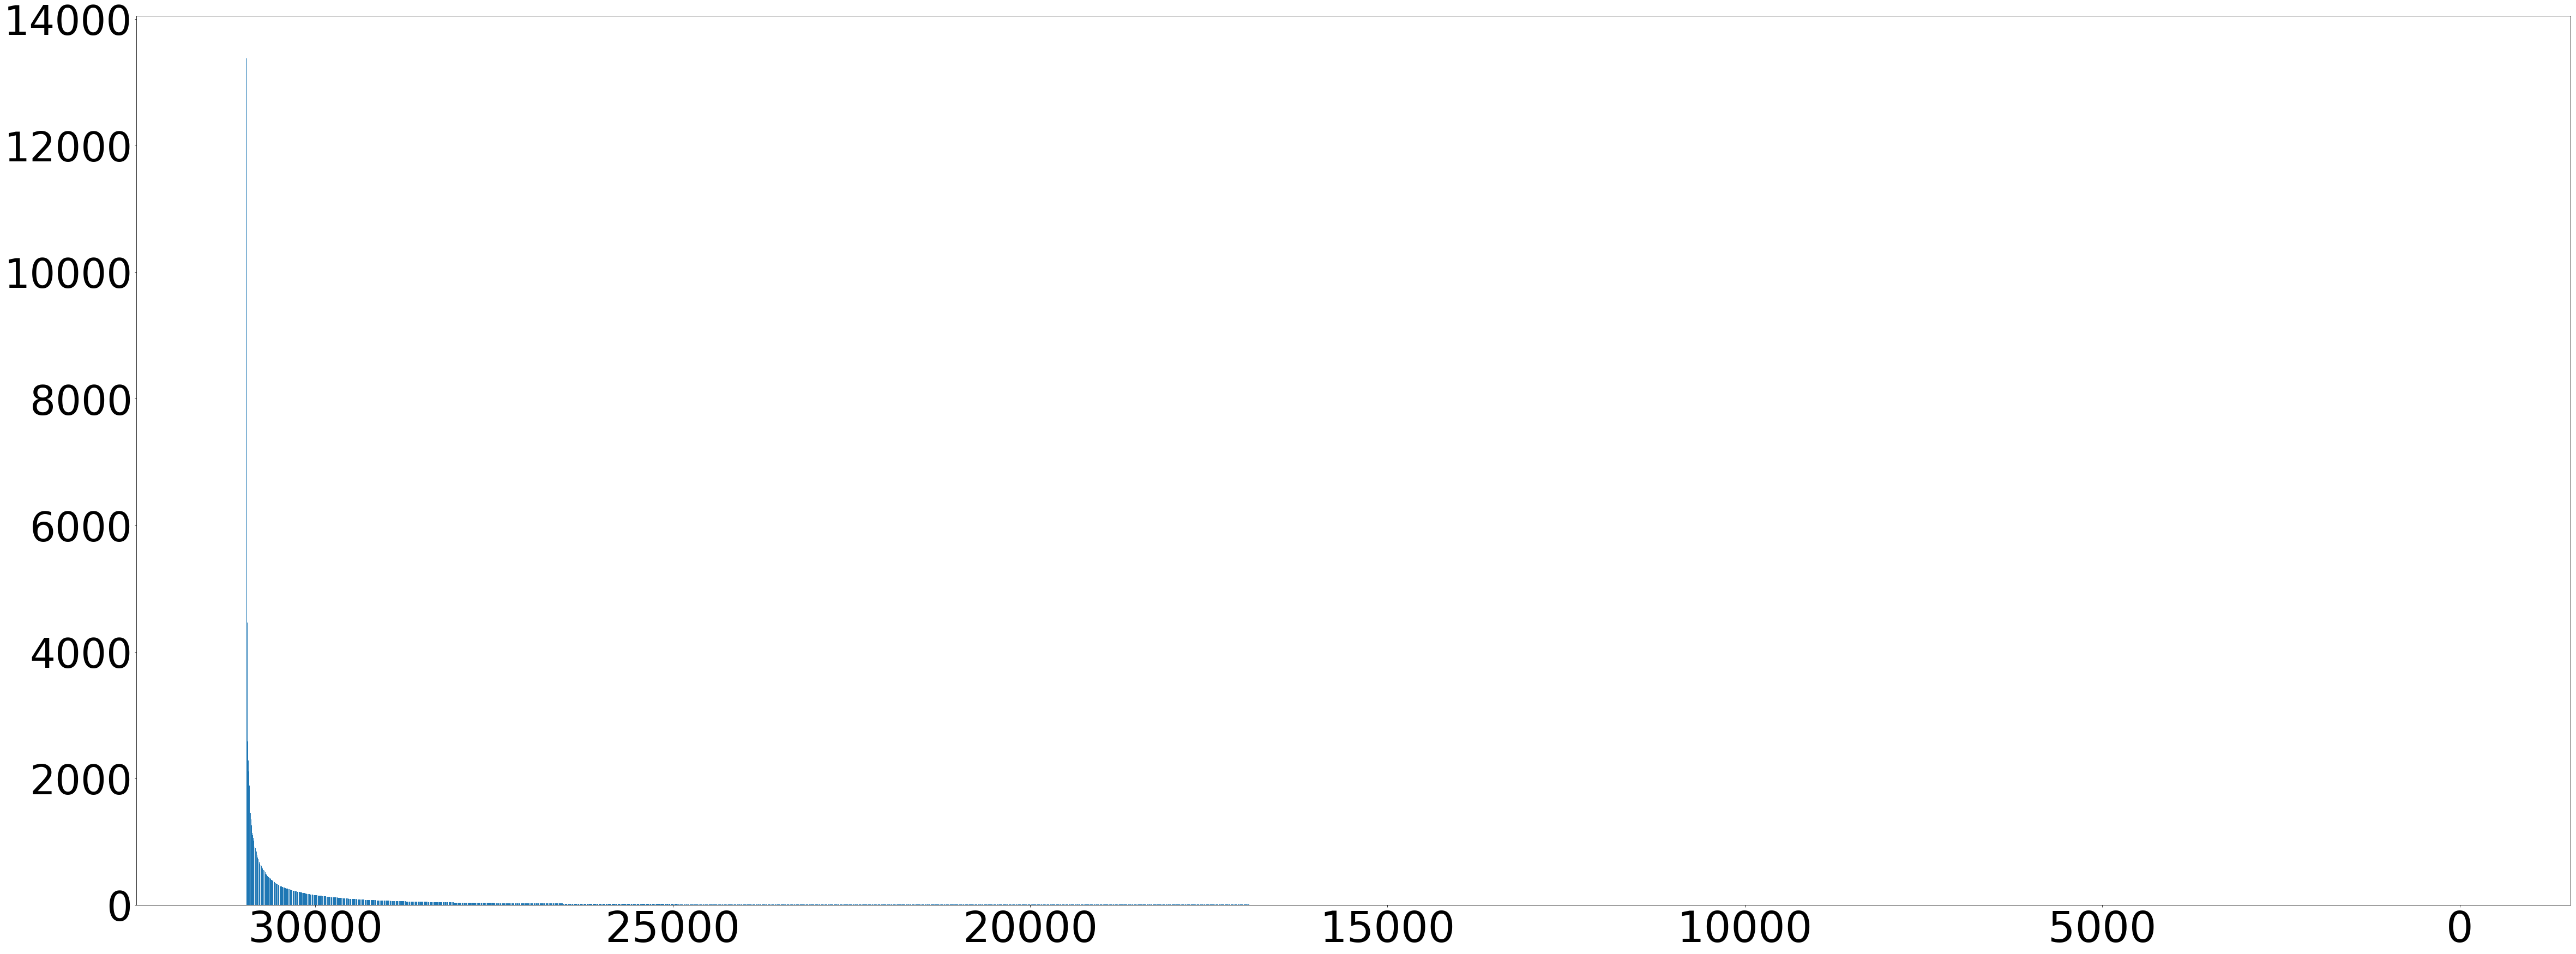

In [93]:
################ plotting the words and their count ################ Still fixing
################ plotting the words and their count ################ Still fixing
################ plotting the words and their count ################ Still fixing

plt.figure(figsize=(80,30))
plt.tick_params(axis="x", labelsize=78)
plt.tick_params(axis="y", labelsize=74)
#plt.gca().invert_xaxis()
plt.bar(range(len(count)),count[:],orientation='vertical')
plt.show()

In [89]:
len(count)

30960

In [26]:
pred[4]

0

In [27]:
df.spam[5004]

0